In [8]:
import pandas as pd
df=pd.read_csv('Capstone.csv')
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [7]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [29]:

#left=1 employ exit,left=0 employ working
import pandas as pd
df = pd.read_csv("Capstone.csv")
df.describe()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [16]:
# Count unique values in category columns
print(df['Department'].value_counts())
print(df['salary'].value_counts())
print(df['left'].value_counts())

# Average satisfaction by department,average num of people who had left dept based on satisfaction level
print(df.groupby('Department')['satisfaction_level'].mean())

#  satisfaction across salary bands
print(df.groupby('salary')['satisfaction_level'].mean())

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64
salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64
left
0    11428
1     3571
Name: count, dtype: int64
Department
IT             0.618142
RandD          0.619822
accounting     0.582151
hr             0.598809
management     0.621349
marketing      0.618601
product_mng    0.619634
sales          0.614447
support        0.618300
technical      0.607897
Name: satisfaction_level, dtype: float64
salary
high      0.637470
low       0.600753
medium    0.621817
Name: satisfaction_level, dtype: float64


In [17]:
# Average monthly hours of employees who left vs stayed
print(df.groupby('left')['average_monthly_hours'].mean())

left
0    199.060203
1    207.419210
Name: average_monthly_hours, dtype: float64


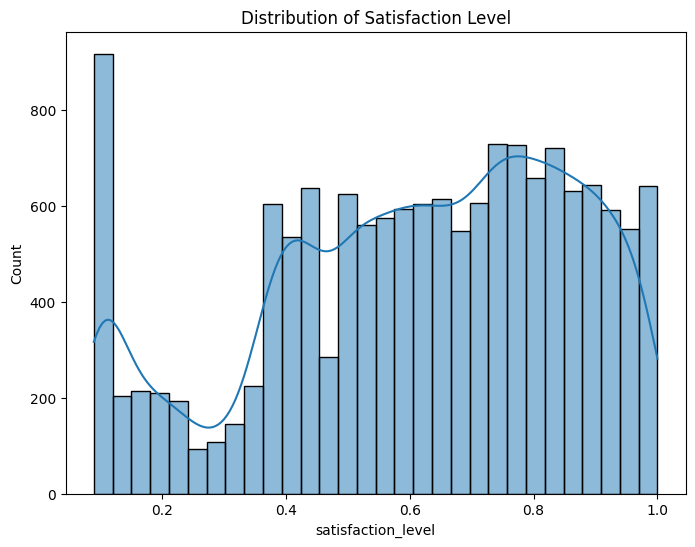

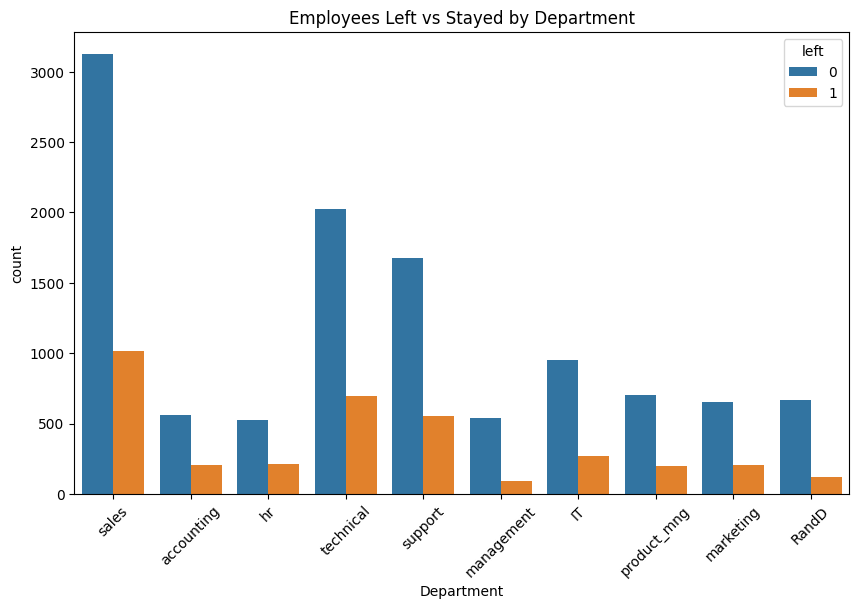

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of satisfaction level,
plt.figure(figsize=(8,6))
sns.histplot(df['satisfaction_level'], bins=30, kde=True)
plt.title('Distribution of Satisfaction Level')
plt.show()

# Bar chart
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Department', hue='left')
plt.title('Employees Left vs Stayed by Department')
plt.xticks(rotation=45)
plt.show()

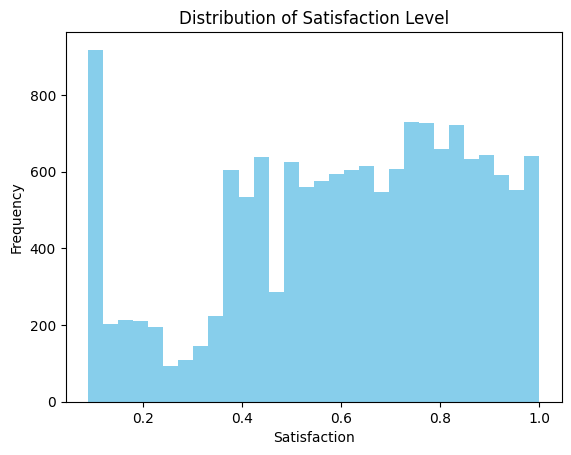

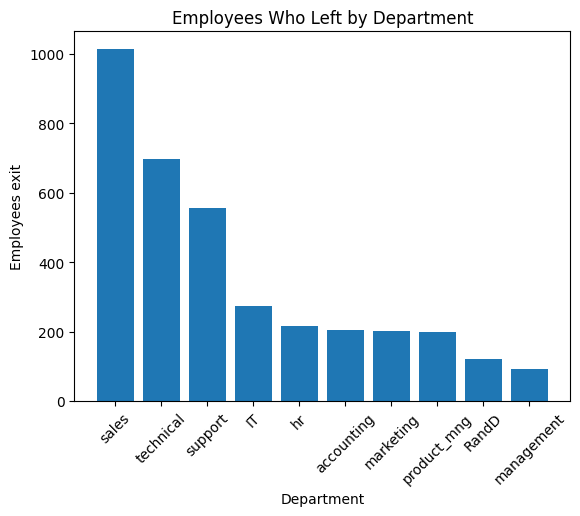

In [19]:
import matplotlib.pyplot as plt

# Histogram with Matplotlib
plt.hist(df['satisfaction_level'], bins=30, color='skyblue')
plt.title('Distribution of Satisfaction Level')
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')
plt.show()

# Bar Chart: by Department
department_counts = df[df['left'] == 1]['Department'].value_counts()
plt.bar(department_counts.index, department_counts.values)
plt.title('Employees Who Left by Department')
plt.xticks(rotation=45)
plt.xlabel('Department')
plt.ylabel('Employees exit')
plt.show()


In [1]:
summary = """
Summary of Pre-Model Insights:
- Employees who left tend to have lower satisfaction levels and higher monthly working hours.
- Certain departments (e.g sales, technical) show higher exit rates.
- Lack of promotion and lower salary levels correlate with higher turnover.
- Strong inverse correlation observed between satisfaction and likelihood of leaving."""
print(summary)



Summary of Pre-Model Insights:
- Employees who left tend to have lower satisfaction levels and higher monthly working hours.
- Certain departments (e.g sales, technical) show higher exit rates.
- Lack of promotion and lower salary levels correlate with higher turnover.
- Strong inverse correlation observed between satisfaction and likelihood of leaving.


In [14]:
# Importing the required function
from sklearn.preprocessing import LabelEncoder

# Encode 'Department'
le_dept = LabelEncoder()
df['Department_encoded'] = le_dept.fit_transform(df['Department'])

# Encode 'salary'
le_salary = LabelEncoder()
df['salary_encoded'] = le_salary.fit_transform(df['salary'])
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,Department_encoded,salary_encoded
0,0.38,0.53,2,157,3,0,1,0,sales,low,7,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,7,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,8,1
14995,0.37,0.48,2,160,3,0,1,0,support,low,8,1
14996,0.37,0.53,2,143,3,0,1,0,support,low,8,1
14997,0.11,0.96,6,280,4,0,1,0,support,low,8,1


In [16]:
# Importing the required function
from sklearn.model_selection import train_test_split

# Specifying the predictors and target
predictors = ["satisfaction_level", "average_monthly_hours", "promotion_last_5years", "Department_encoded", "salary_encoded"]
target = "left"

X = df[predictors]  # Inputs for prediction
y = df[target]      # Target label: whether employee left

# Splitting the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Viewing the shape of resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (10499, 5)
Shape of X_test: (4500, 5)
Shape of y_train: (10499,)
Shape of y_test: (4500,)


In [20]:
# Importing the model class
from sklearn.linear_model import LogisticRegression

# Create the model object
model = LogisticRegression(max_iter=300)

# Training the model on training data
model.fit(X_train, y_train)

# Checking model accuracy on test data
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.7686666666666667


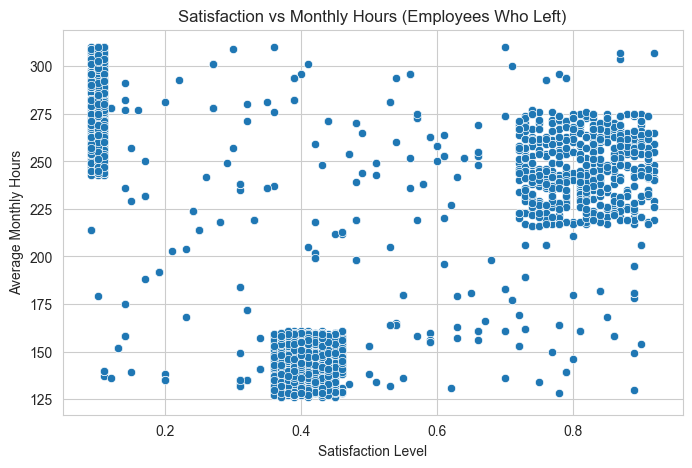

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering employees who left
left_df = df[df["left"] == 1]

# Plot satisfaction vs working hours
plt.figure(figsize=(8, 5))
sns.scatterplot(data=left_df, x="satisfaction_level", y="average_monthly_hours")
plt.title("Satisfaction vs Monthly Hours (Employees Who Left)")
plt.xlabel("Satisfaction Level")
plt.ylabel("Average Monthly Hours")
plt.grid(True)
plt.show()


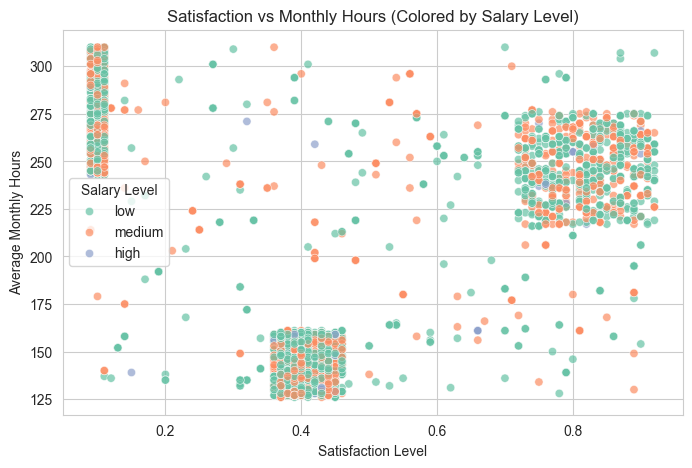

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter employees who left
left_df = df[df["left"] == 1]

#  scatter plot with color-coded salary levels
plt.figure(figsize=(8, 5))
sns.scatterplot(data=left_df,x="satisfaction_level",y="average_monthly_hours",hue="salary",palette="Set2",alpha=0.7)

plt.title("Satisfaction vs Monthly Hours (Colored by Salary Level)")
plt.xlabel("Satisfaction Level")
plt.ylabel("Average Monthly Hours")
plt.grid(True)
plt.legend(title="Salary Level")
plt.show()


Satisfaction Level Statistics for Leavers:
count    3571.000000
mean        0.440098
std         0.263933
min         0.090000
25%         0.130000
50%         0.410000
75%         0.730000
max         0.920000
Name: satisfaction_level, dtype: float64


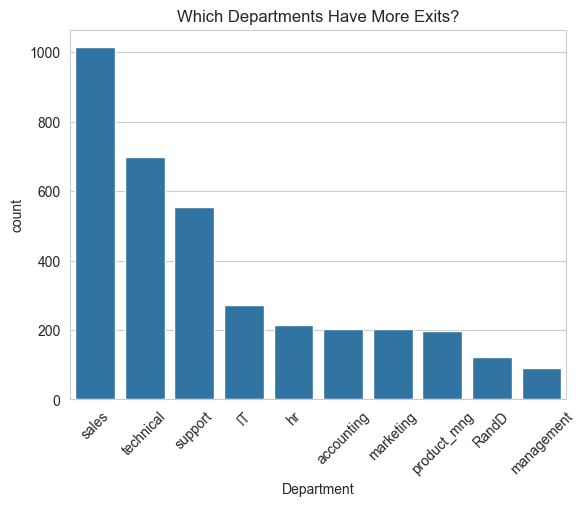

In [26]:
left_df = df[df["left"] == 1]  # only employees who left
print("Satisfaction Level Statistics for Leavers:")
print(left_df["satisfaction_level"].describe())
import seaborn as sns
sns.countplot(data=left_df, x="Department", order=left_df["Department"].value_counts().index)
plt.title("Which Departments Have More Exits?")
plt.xticks(rotation=45)
plt.show()

Promotion Status Among Leavers:
promotion_last_5years
0    3552
1      19
Name: count, dtype: int64


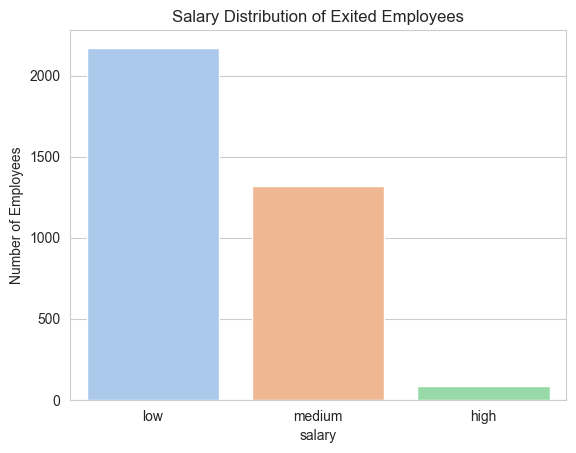

In [28]:
promo_counts = left_df["promotion_last_5years"].value_counts()
print("Promotion Status Among Leavers:")
print(promo_counts)
salary_counts = left_df["salary"].value_counts()
sns.barplot( x=salary_counts.index, y=salary_counts.values,hue=salary_counts.index,palette="pastel",legend=False)
plt.title("Salary Distribution of Exited Employees")
plt.ylabel("Number of Employees")
plt.show()
